# Intro

This is a notebook summarizing experiments run in Summer 2024 by Nick Huang investigating the various use cases and performance of Prediction Powered Inference (PPI).

The equation for PPI variance, which is a key focus is given by 
\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{f - Y}}{n} + \frac{\hat{\sigma}^2_{f}}{N}} 
\end{equation}

Recall that the variance of the classical estimator is given by

\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{Y}}{n}}
\end{equation}

And the third method that we will be using, is naive (imputation) method, in which we have the model predict *all* outputs, and treat them as true data to perform inference. In this case, our variance becomes.

\begin{equation}
    \sqrt{\frac{\hat{\sigma}^2_{f}}{n + N}} 
\end{equation}

Nmaely there are 3 terms that we want to modify, $n, N, \sigma^2_{f - Y}$

In [3]:
# Imports

import distributions as dist
import numpy as np
import matplotlib.pyplot as plt
import ppi
import ppi_py
import scipy.stats as stats
import pandas as pd
import ml_models as ml
import distributions as dist

import yaml
import os
import sys
import argparse
import plotting
import copy

c:\Users\Ziyu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Experiment 1

### Setting 1

Here we have a very idealized experiment, $X \sim Gamma(2, 2)$, and $Y = 4X + \varepsilon$. Here $\varepsilon \sim N(0, m^2 * \alpha * \beta * \frac{1 - \rho}{\rho})$, in this case, $m = 4, \alpha = 2, \beta = 2$, and $\rho$ is varied so that $Corr(X, Y) = \rho$.

We fit a linear regression model, in this scenario we expect PPI to permform very well, and should be a big improvement over classical methods.

In the following example, we set $n = 128, 16, N = 10000$, in which case, the second term in $(1)$ is irrelevant. (specify here that n = labelled data, N = unlabelled data).

We run each experiment 1000 times, resampling every population (training, labelled, unlabelled) every time.

Add in $n = 16, 128, 512, 1024$

### Good $n, N$, $\sigma^2_{f - Y}$ (model)

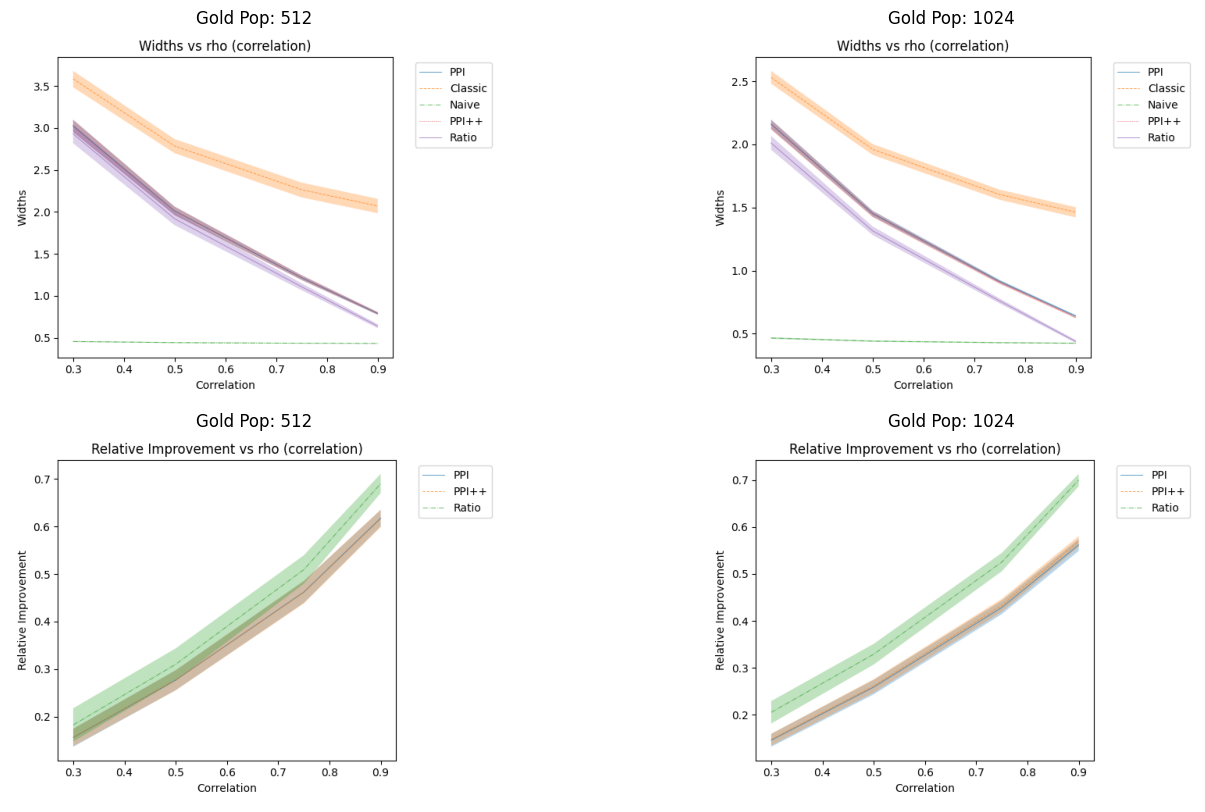

In [4]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/widthsplotwithratio.png'
gold_16 = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/widthsplotwithratio.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/relativeimprovementwithratio.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/relativeimprovementwithratio.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


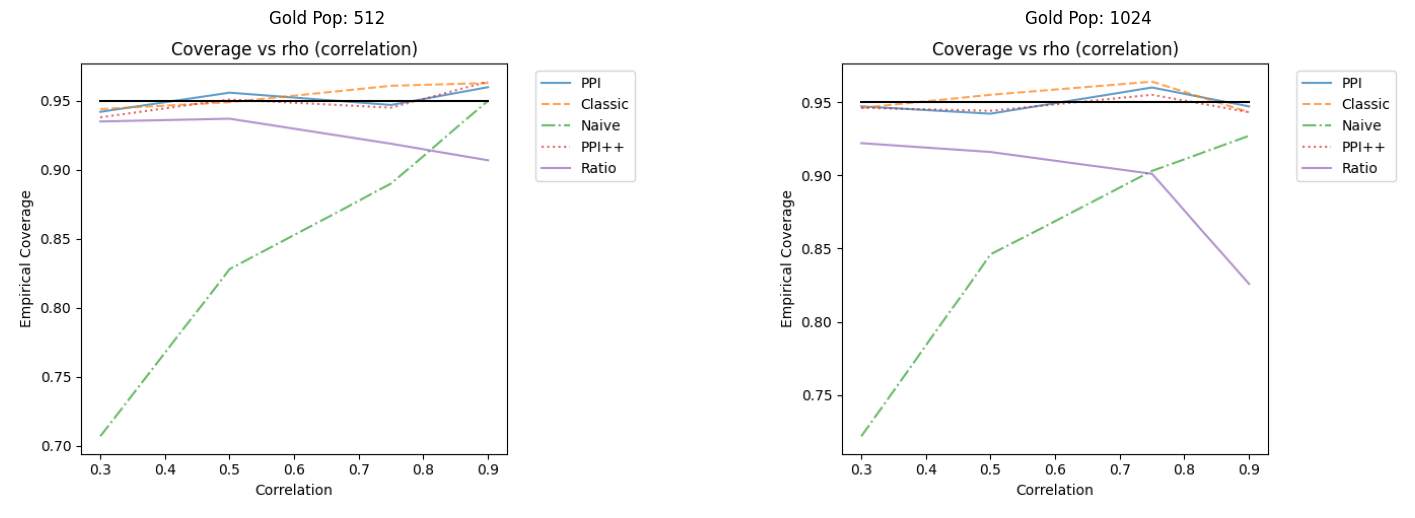

In [5]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/512g_l_reg_2024-08-14-23-50-59/plots/coverageplotwithratio.png'
gold_16_cov = '../experiments/Experiment_1_new/1024g_l_reg_2024-08-14-23-54-03/plots/coverageplotwithratio.png'

# Display the PNG file
img_128_cov = plt.imread(gold_128_cov)
img_16_cov = plt.imread(gold_16_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 512')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 1024')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

- The most ideal case for PPI, we see that as the there is less noise in the data (data is more linear/correlated), the model will perform better, and hence so will PPI.

- Overall, the gains from PPI are very obvious

- Naive imputation has very small widths, but isn't guaranteed to get the desired coverage rate

### Bad $n$ Good $N$, model

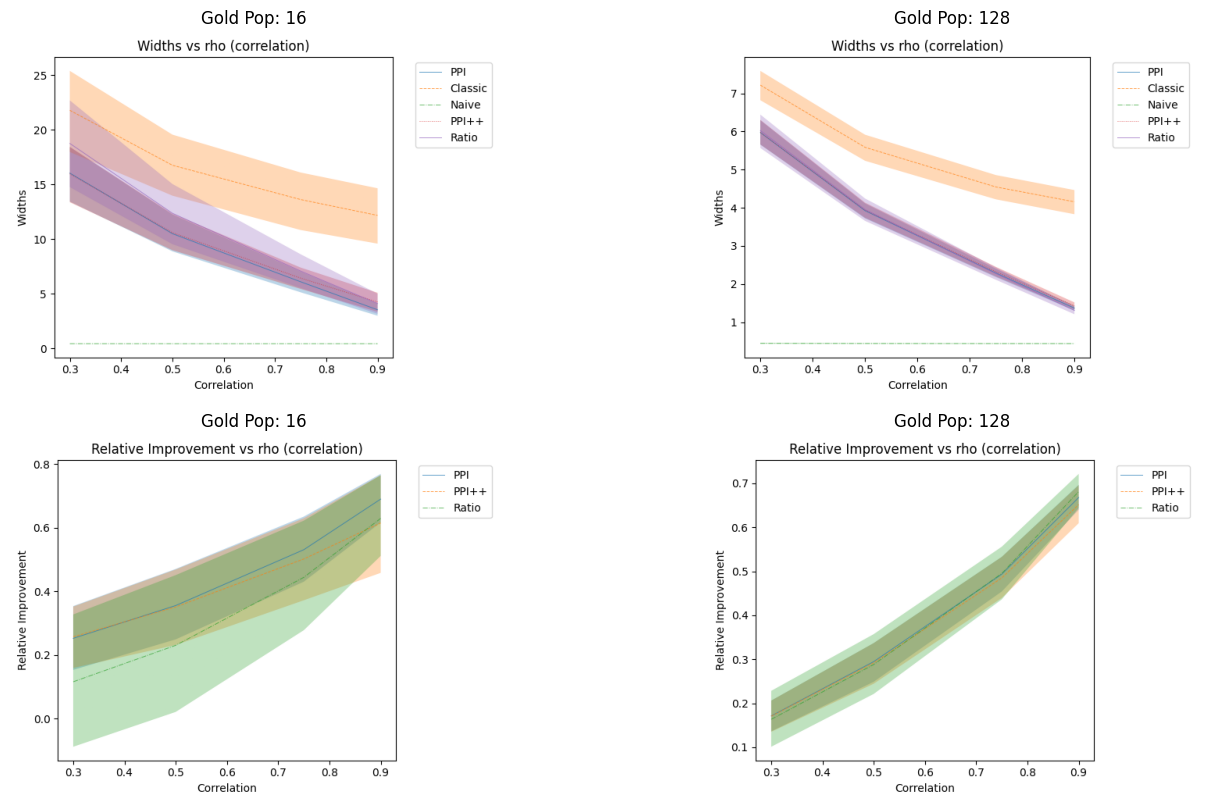

In [6]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/widthsplotwithratio.png'
gold_16 = '../experiments/Experiment_1_new/128g_l_reg_2024-08-22-08-59-11/plots/widthsplotwithratio.png'
gold_128_ri = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/relativeimprovementwithratio.png'
gold_16_ri = '../experiments/Experiment_1_new/128g_l_reg_2024-08-22-08-59-11/plots/relativeimprovementwithratio.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 16')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 128')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 16')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 128')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


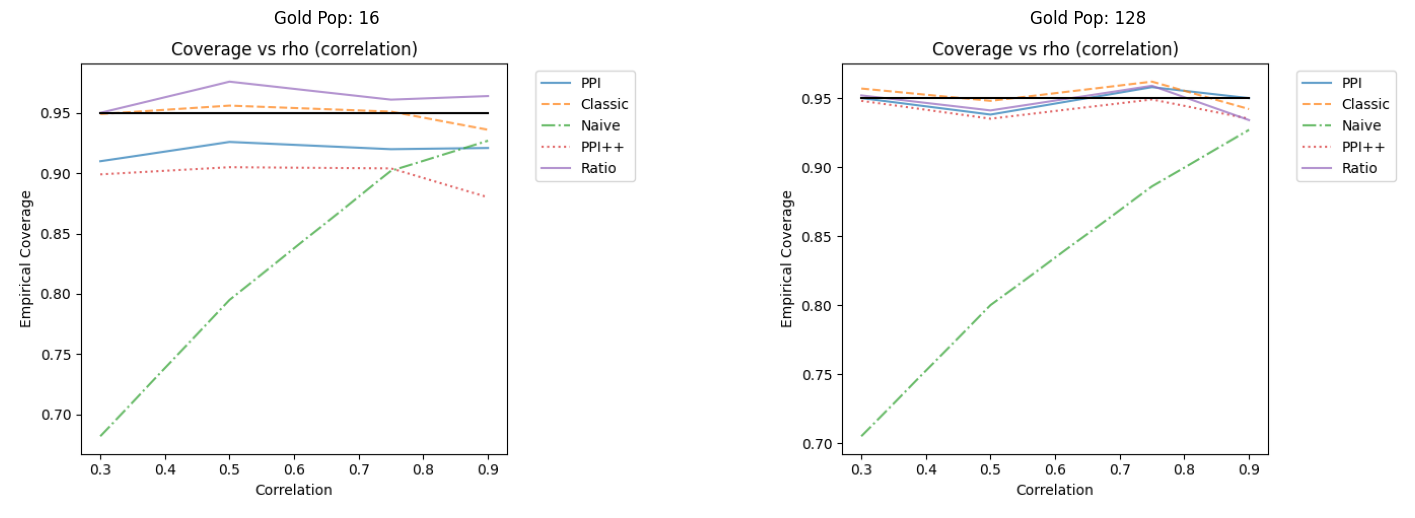

In [29]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/16g_l_reg_2024-08-13-23-12-17/plots/coverageplotwithratio.png'
gold_16_cov = '../experiments/Experiment_1_new/128g_l_reg_2024-08-22-08-59-11/plots/coverageplotwithratio.png'

# Display the PNG file
img_128_cov = plt.imread(gold_128_cov)
img_16_cov = plt.imread(gold_16_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 16')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 128')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

About the same, results are not as good as the previous, but still good.

Recover the model performance, fit XGBoost

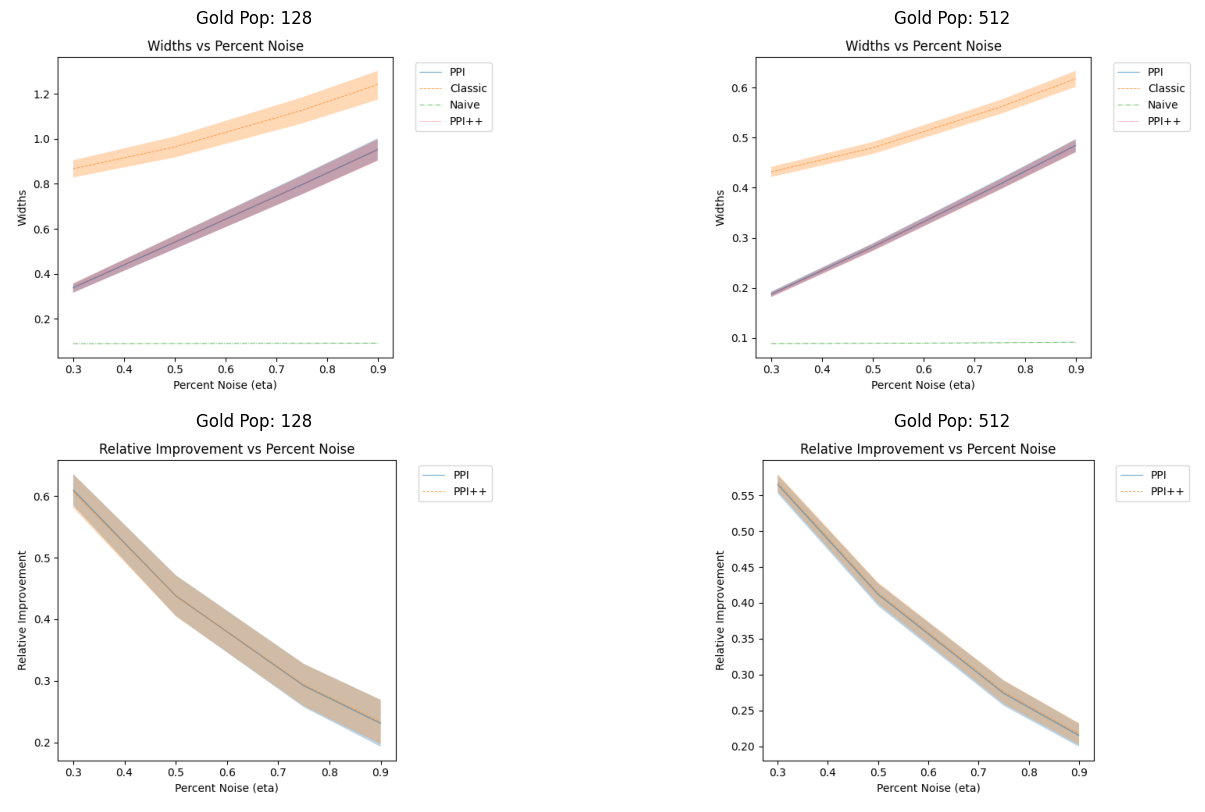

In [34]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/128g_nl_xgb_2024-08-13-21-21-16/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/512g_nl_xgb_2024-08-14-23-51-43/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/128g_nl_xgb_2024-08-13-21-21-16/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/512g_nl_xgb_2024-08-14-23-51-43/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 128')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 512')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 128')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 512')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


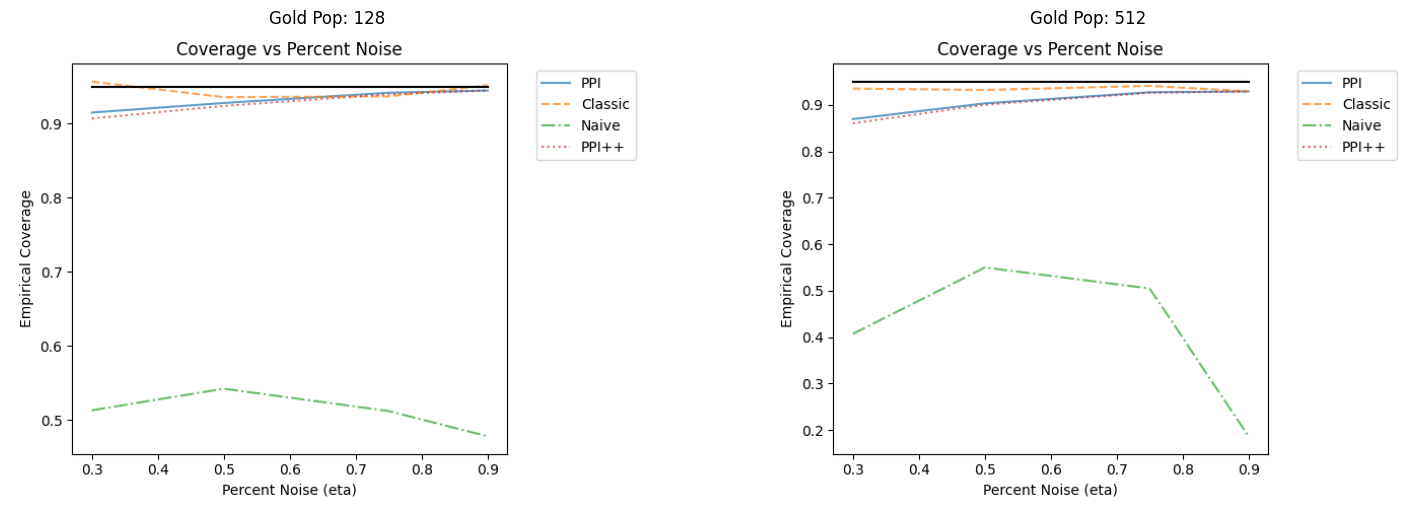

In [33]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/128g_nl_xgb_2024-08-13-21-21-16/plots/coverageplot.png'
gold_16_cov = '../experiments/Experiment_1_new/512g_nl_xgb_2024-08-14-23-51-43/plots/coverageplot.png'

# Display the PNG file
img_128_cov = plt.imread(gold_128_cov)
img_16_cov = plt.imread(gold_16_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 128')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 512')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

### Setting 2

In this case, we change the distribution of $X \sim N(0, 4^2)$, however in this case, we set $Y = 3 * \sin (X) + \exp(X / 6) + \varepsilon$. Here $\varepsilon \sim N(0, (3 * \eta)^2)$. As such, the relationship is non symmetric, and highly non-linear. $
\eta = 0.3, 0.5, 0.7, 0.9$, which we call, the percent noise value

### Setting 2 Configurations

- Gold (Labelled) Distribution $\sim N(0, 4^2)$, non-linear transformation, sample size $n = 16, 128, 512, 1024$
- Unlabelled distribution $\sim N(0, 4^2)$, non-linear transformation, sample size $N = 10000$
- $\eta = 0.1, 0.3, 0.5, 0.7, 0.9$, prevalence of noise
- No distribution shift
- Linear regression/XGBoost

In the example $\eta = 0.4$

### BAD MODEL, GOOD n, N

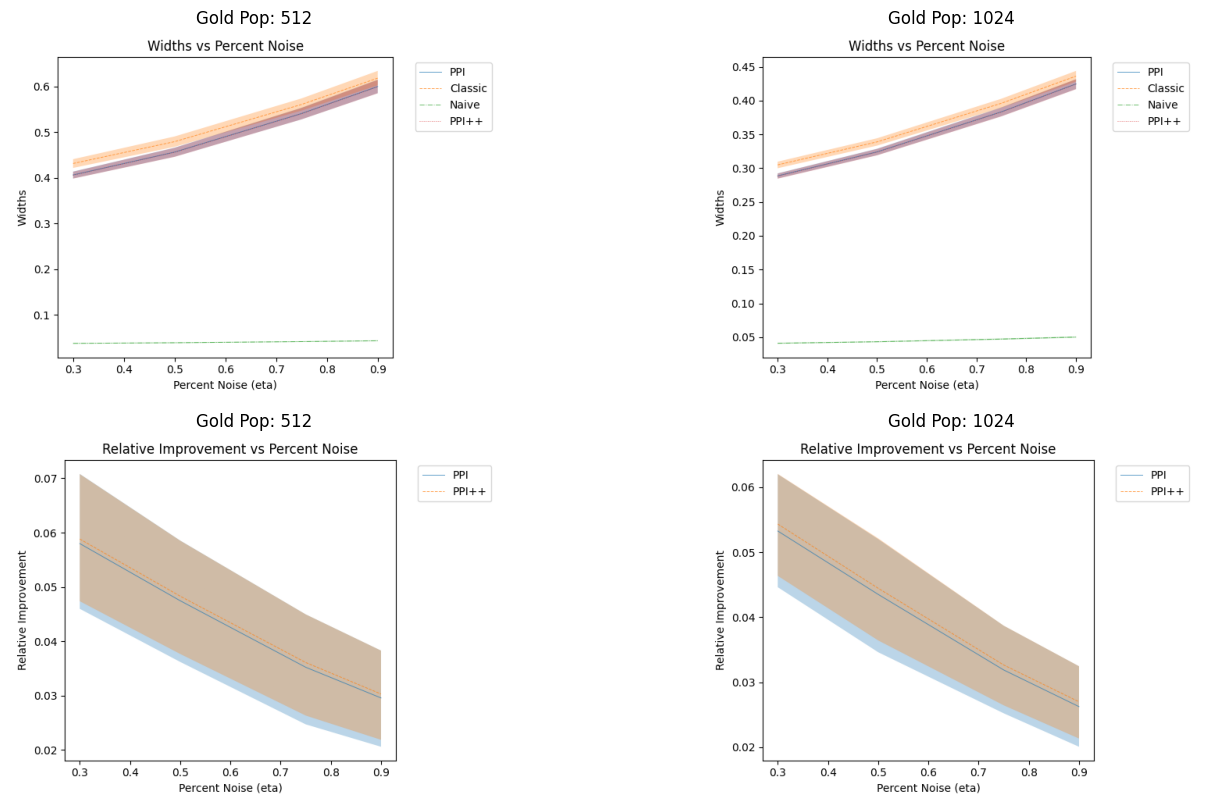

In [8]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


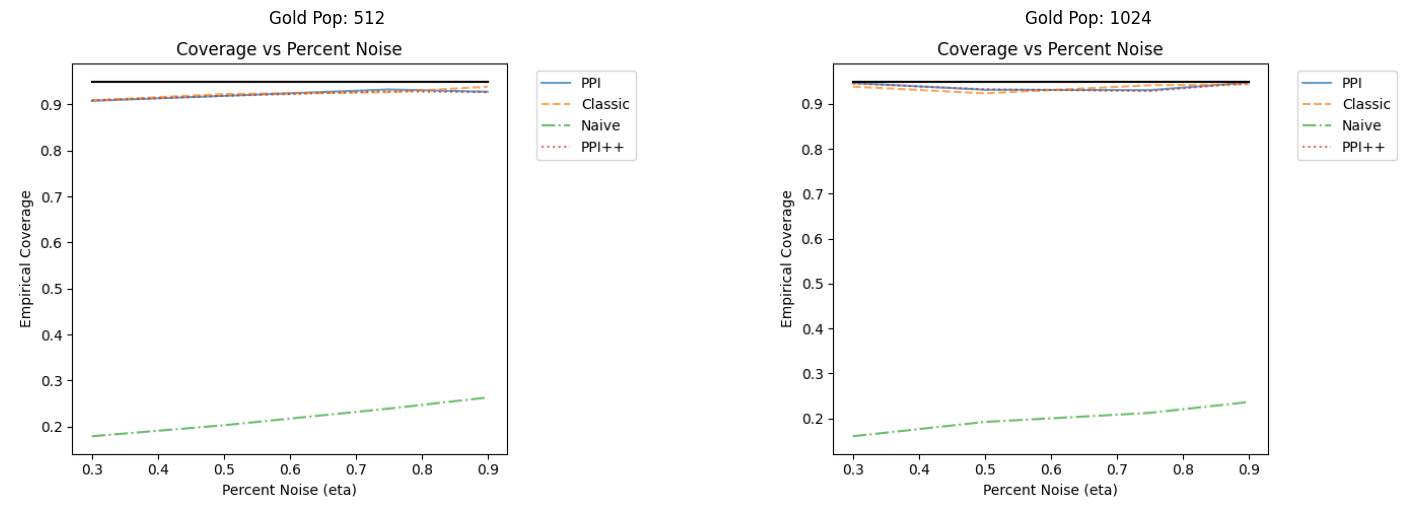

In [9]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/512g_nl_reg_2024-08-14-23-51-21/plots/coverageplot.png'
gold_16_cov = '../experiments/Experiment_1_new/1024g_nl_reg_2024-08-14-23-54-25/plots/coverageplot.png'

# Display the PNG file
img_128_cov = plt.imread(gold_16_cov)
img_16_cov = plt.imread(gold_128_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 512')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 1024')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

As soon as the model is a bad fit, we can see almost all of the effects of PPI are gone, and the improvements are still marginal, but in this case it still doesn't perform worse, as long as it is a somewhat reasonable model that isn't heavily overfit. No matter what however, coverage stays the same

#### BAD model, n, GOOD N

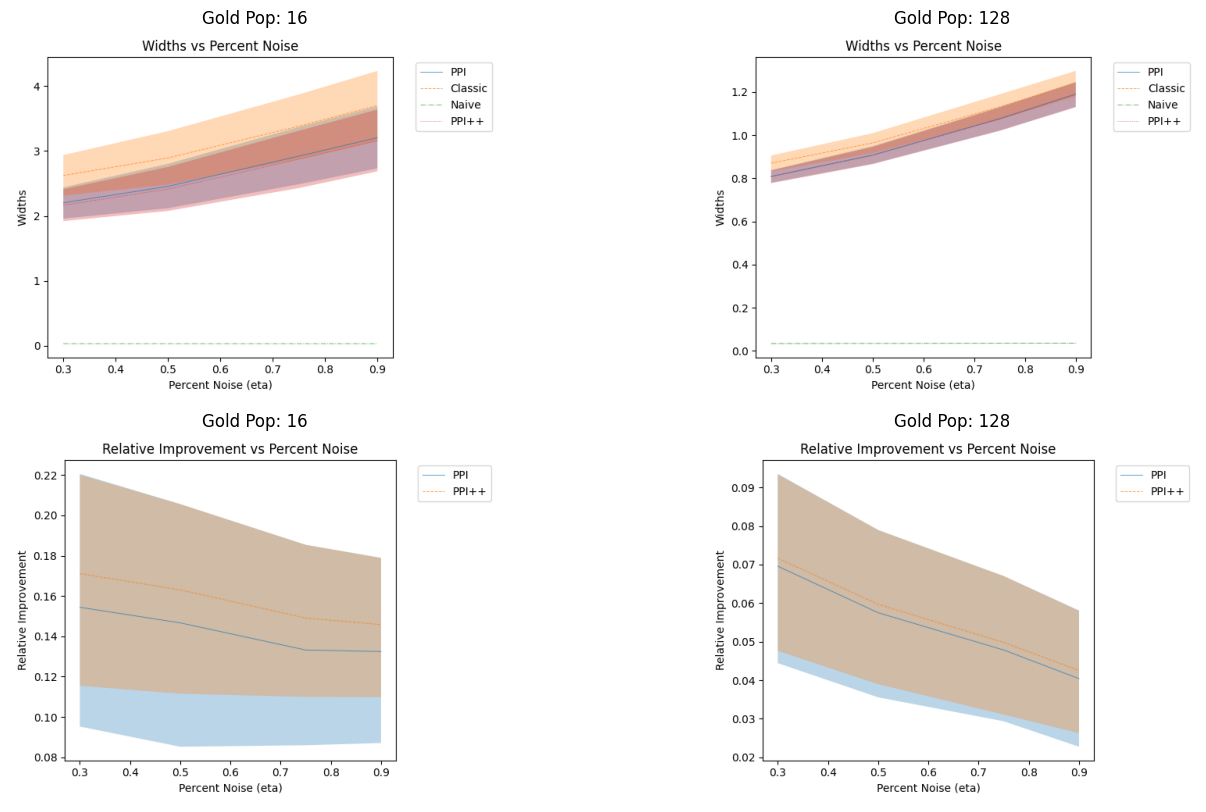

In [10]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 16')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 128')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 16')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 128')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


Similar results, though we actually get slightly better results when gold population is very low, mostly because classical also isn't very good at grabbing the mean.

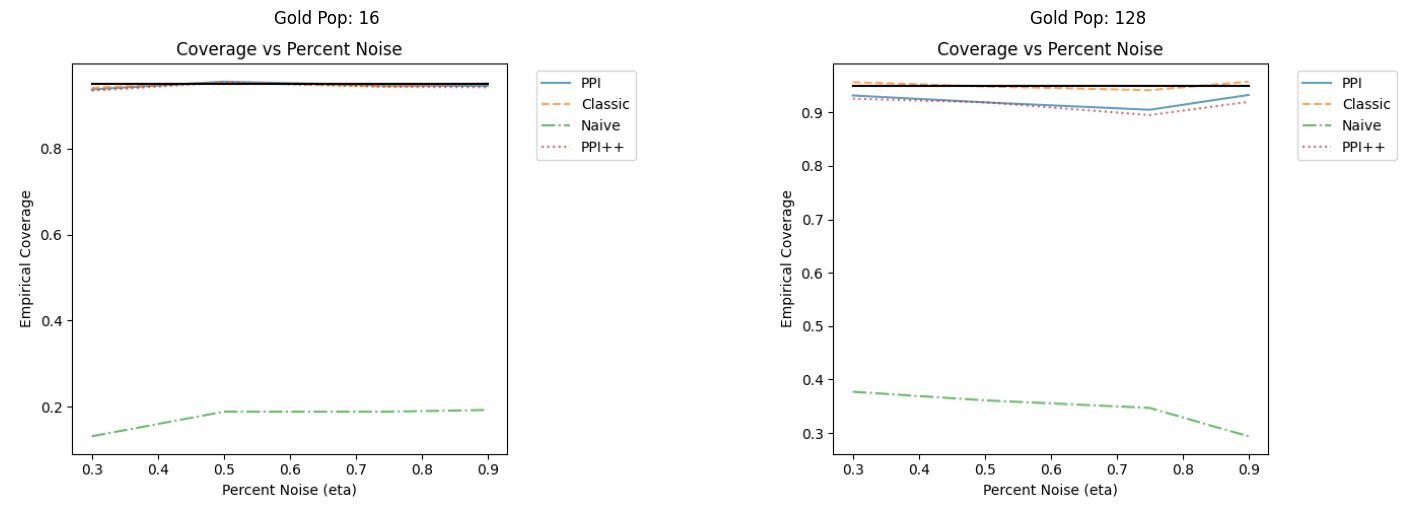

In [11]:
# Coverage plots

# Set the variable to the path of the PNG file
gold_128_cov = '../experiments/Experiment_1_new/16g_nl_reg_2024-08-14-23-50-37/plots/coverageplot.png'
gold_16_cov = '../experiments/Experiment_1_new/128g_nl_reg_2024-08-13-23-13-23/plots/coverageplot.png'

# Display the PNG file
img_128_cov = plt.imread(gold_16_cov)
img_16_cov = plt.imread(gold_128_cov)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_128_cov)
ax[0].axis('off')
ax[0].set_title('Gold Pop: 16')
ax[1].imshow(img_16_cov)
ax[1].axis('off')
ax[1].set_title('Gold Pop: 128')
# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()

#### Small N, equal or larger n, bad model

Here $N = 512$

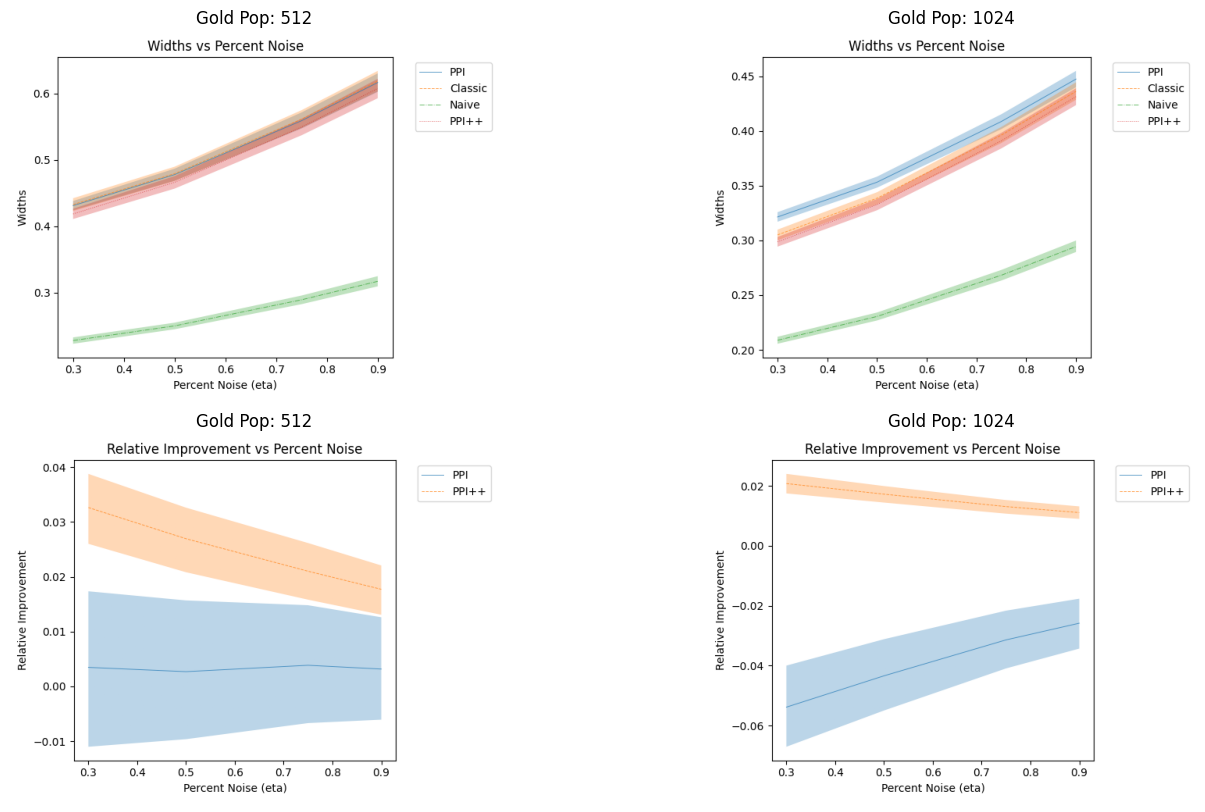

In [12]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
gold_128 = '../experiments/Experiment_1_new/512g_nl_reg_1024N_2024-08-20-01-41-42/plots/widthsplot.png'
gold_16 = '../experiments/Experiment_1_new/1024g_nl_reg_1024N_2024-08-20-01-42-00/plots/widthsplot.png'
gold_128_ri = '../experiments/Experiment_1_new/512g_nl_reg_1024N_2024-08-20-01-41-42/plots/relativeimprovement.png'
gold_16_ri = '../experiments/Experiment_1_new/1024g_nl_reg_1024N_2024-08-20-01-42-00/plots/relativeimprovement.png'

# Display the PNG file
img_128 = plt.imread(gold_128)
img_16 = plt.imread(gold_16)
im_128_ri = plt.imread(gold_128_ri)
im_16_ri = plt.imread(gold_16_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_128)
ax[0, 0].axis('off')
ax[0, 0].set_title('Gold Pop: 512')
ax[0, 1].imshow(img_16)
ax[0, 1].axis('off')
ax[0, 1].set_title('Gold Pop: 1024')
ax[1, 0].imshow(im_128_ri)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gold Pop: 512')
ax[1, 1].imshow(im_16_ri)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gold Pop: 1024')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


Bad ratio, boom, in this case results are even worse than classical.

Summary:

3 things control PPI performance:

- Size of $n, N$ and value of $\hat{\sigma}_{f - Y}$

- If $N$ is large, and much larger than $n$, then the term $\hat{\sigma}_{f}/N$ is negligible

- The better the model fit, the better the imporvement

- Small $n$ proportionally benefits more from PPI, *especially* if the model is trained well
    - Compare $\hat{\sigma}_{Y}/n$ and $\hat{\sigma}_{f - Y}/n$ terms
        - If there aren't many terms, $\hat{\sigma}_{Y}$ can often be large, but if model is good, $\hat{\sigma}_{f - Y}$ is rarely large

- When $N \geq n$, *and* model is bad, there is potential for PPI to do worse than classical
    - However, PPI++ can mitigate some of these issues
    - PPI++ tends to see benefits, the closer PPI and classical widths are
    - If $n \ll N$, then so long as $f$ somewhat follows the trend of $Y$, then in general $\sigma_{f - Y} \leq \sigma_Y$
        - This is why we need $N \geq n$ as then $\sigma_f$ is no longer negligible

- If we have both $n \ll N$ and $\hat{\sigma}_{f - Y}$, PPI++ is negligible difference

- PPI provides much better performance under sufficient assumptions, and has statistical coverage guarantees over simply imputing using an ML model

- Needs no information of the model, as long as it fits well and isn't overfitting. See: XGBoost on a weird non-linear dataset.

## Experiment 2

## Experiment 2

In this experiment, we will investigate what happens when we apply the problem of distributional shift to the problem. Recall in the previous experiment, the distribution of the training, gold, unlabelled data are all the same. In this case we take $P_X^t \neq P_X^g = P_X^u$, however, in all three distributions, we keep the same probability distribution $P_{Y|X}$. That is, for any point $x$ that is near the training distribution, we expect good inference results. 

On the other hand, if we have a complicated relationship, that is difficult to infer accurately on, we expect as the distribution shifts further and further away from the training data, performance will become worse and worse.

### Setting 1

#### Near perfect model, linear relationship

As a best case scenario, suppose $Y = 4X + \varepsilon$, $X^t \sim Gamma(2, 2)$, and $Y = 4X + \varepsilon$. Here $\varepsilon \sim N(0, m^2 * \alpha * \beta * \frac{1 - \rho}{\rho})$ as in, in experiment 1. Here, we set $\rho = 0.75$

We will look at a fair number of distributions, with

$X_0 \sim Gamma(2, 2)$ (Base case) 

$X_1 \sim Gamma(2, 3)$ 

$X_2 \sim Gamma(2, 4)$ 

$X_3 \sim Gamma(3, 2)$ 

$X_4 \sim Gamma(4, 2)$ 

$X_5 \sim Gamma(3, 3)$ 

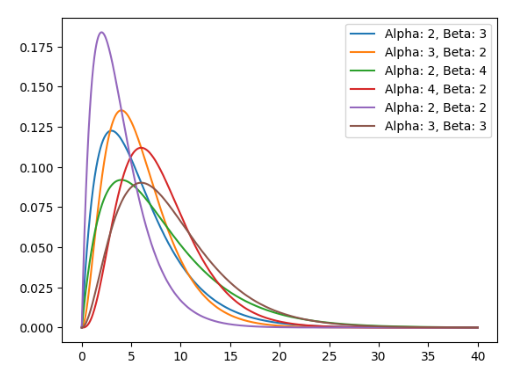

In [13]:
# The distribution plots

# Set the variable to the path of the PNG file

dist_plot_1 = "../experiments/Experiment_2_new/1kt_c_lin_reg_2024-08-17-15-10-01/plots/distplots.png"

# Display the PNG file

img_dist_plot_1 = plt.imread(dist_plot_1)
plt.imshow(img_dist_plot_1)
plt.axis('off')
plt.show()


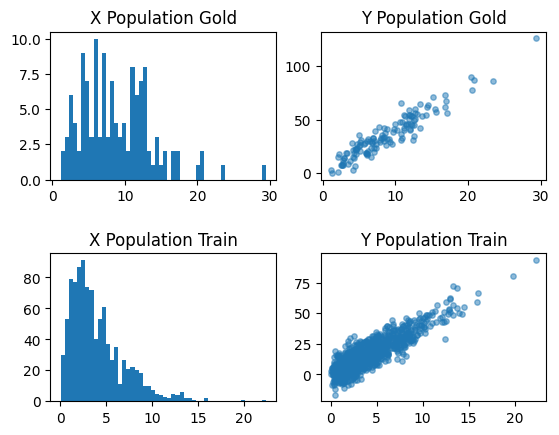

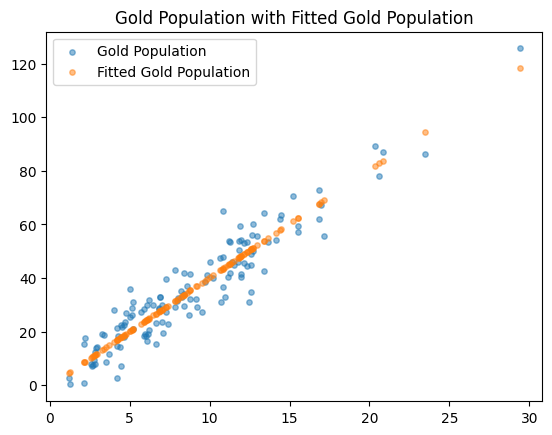

In [14]:
# Visualize the two distributions

def test3(config):
    rho_vals = [.75]
    pop_config = config['experiment']['parameters']['gold_population']
    train_config = config['experiment']['parameters']['training_population']
    for rho in rho_vals:
        pop_config['y_population']['rho'] = rho
        train_config['y_population']['rho'] = rho

        pop_config['x_population']['alpha'] = 3
        pop_config['x_population']['beta'] = 3

        x_gold, y_gold = dist.sample_population(pop_config)

        ml_config = config['experiment']['model']

        x_train, y_train = dist.sample_population(train_config)

        model = ml.train_model(x_train, y_train, ml_config)

        y_gold_fitted = model.predict(x_gold)

        # plot the x population and the y population of both the gold and train populations
        fig, ax = plt.subplots(2, 2)
        ax[0, 0].hist(x_gold, bins=50)
        ax[0, 0].set_title("X Population Gold")
        ax[0, 1].scatter(x_gold, y_gold, alpha=0.5, s=15)
        ax[0, 1].set_title("Y Population Gold")
        ax[1, 0].hist(x_train, bins=50)
        ax[1, 0].set_title("X Population Train")
        ax[1, 1].scatter(x_train, y_train, alpha=0.5, s=15)
        ax[1, 1].set_title("Y Population Train")

        # put some vertical space between the plots
        plt.subplots_adjust(hspace=0.5)
        plt.show()

        # plot the gold population and the fitted gold population


        plt.scatter(x_gold, y_gold, alpha=0.5, s=15)
        plt.scatter(x_gold, y_gold_fitted, alpha=0.5, s=15)
        plt.legend(["Gold Population", "Fitted Gold Population"])
        plt.title("Gold Population with Fitted Gold Population")
        plt.show()
    

    return 

config4 = "../configs/Experiment_2_new/1kt_nc_lin_reg.yaml"

with open(config4, 'r') as stream:
    config4 = yaml.safe_load(stream)

test3(config4)

In this case, we have opted for a small training sample, where the size of the training data is only 1000. However, in this case the training data will see *most* of the inference data, in both the gold population and the unlabelled population. However, since the performance is very strong with the model, PPI will perform well on any distribution of $X^t$ so long as it has reasonable overlap with the distribution of $X^g$.

Since the model fits nearly perfectly, we expect performance to be the same, no matter what $X^g$ distribution, as there is considerable overlap between the training and inference population, the performance of PPI should not change much, since the model should perform around the same.

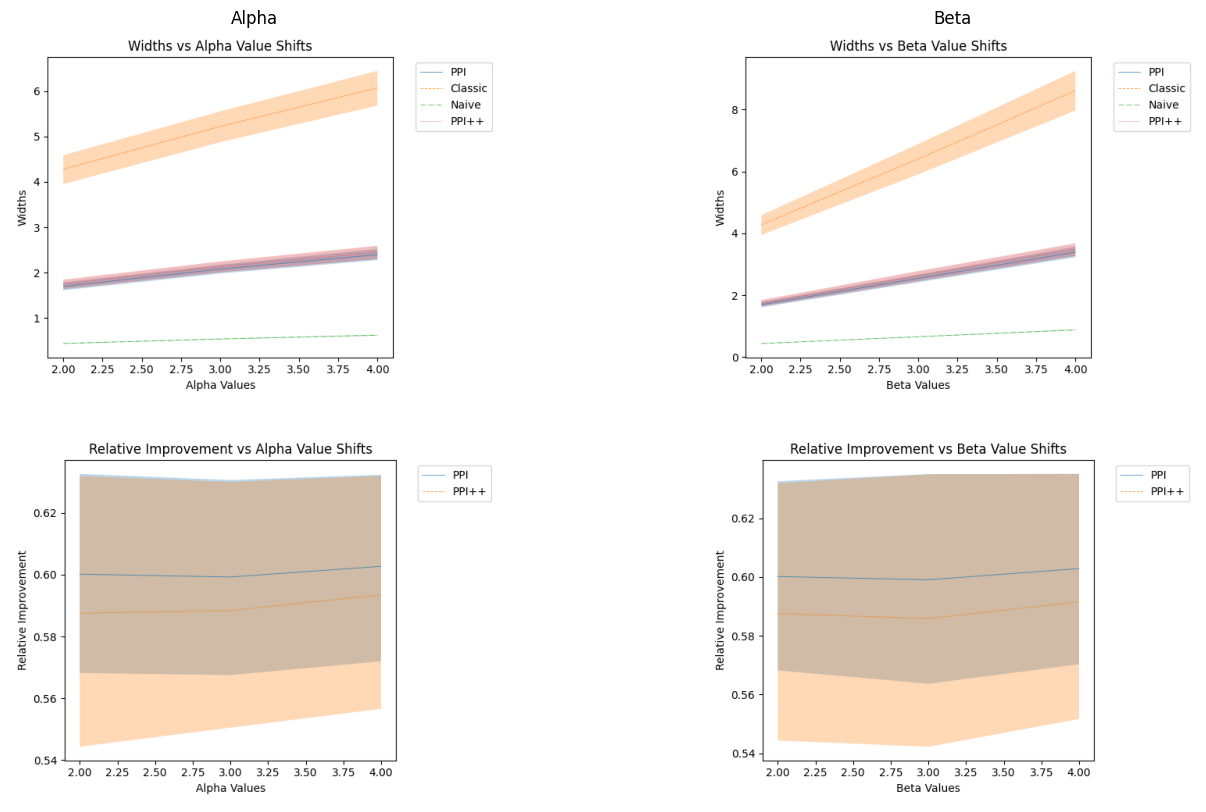

In [15]:
# Display the widths plots

folder = "1kt_nc_lin_reg_2024-08-17-15-41-04"

# Set the variable to the path of the PNG file
alpha_width = f'../experiments/Experiment_2_new/{folder}/plots/widths_alpha_shifts.png'
beta_width = f'../experiments/Experiment_2_new/{folder}/plots/widths_beta_shifts.png'
alpha_ri = f'../experiments/Experiment_2_new/{folder}/plots/relative_alpha_shifts.png'
beta_ri = f'../experiments/Experiment_2_new/{folder}/plots/relative_beta_shifts.png'

# Display the PNG file
img_alpha_width = plt.imread(alpha_width)
img_beta_width = plt.imread(beta_width)
img_alpha_ri = plt.imread(alpha_ri)
img_beta_ri = plt.imread(beta_ri)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_alpha_width)
ax[0, 0].axis('off')
ax[0, 0].set_title('Alpha')
ax[0, 1].imshow(img_beta_width)
ax[0, 1].axis('off')
ax[0, 1].set_title('Beta')
ax[1, 0].imshow(img_alpha_ri)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_beta_ri)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


As expected, the relative improvement is constant, the only reason widths change at all is dependent on the variance of the distribution. For the sake of completion, let's take a look at the relative improvement with respect to Wasserstein Distance/Total Variation Distance from the initial distribution

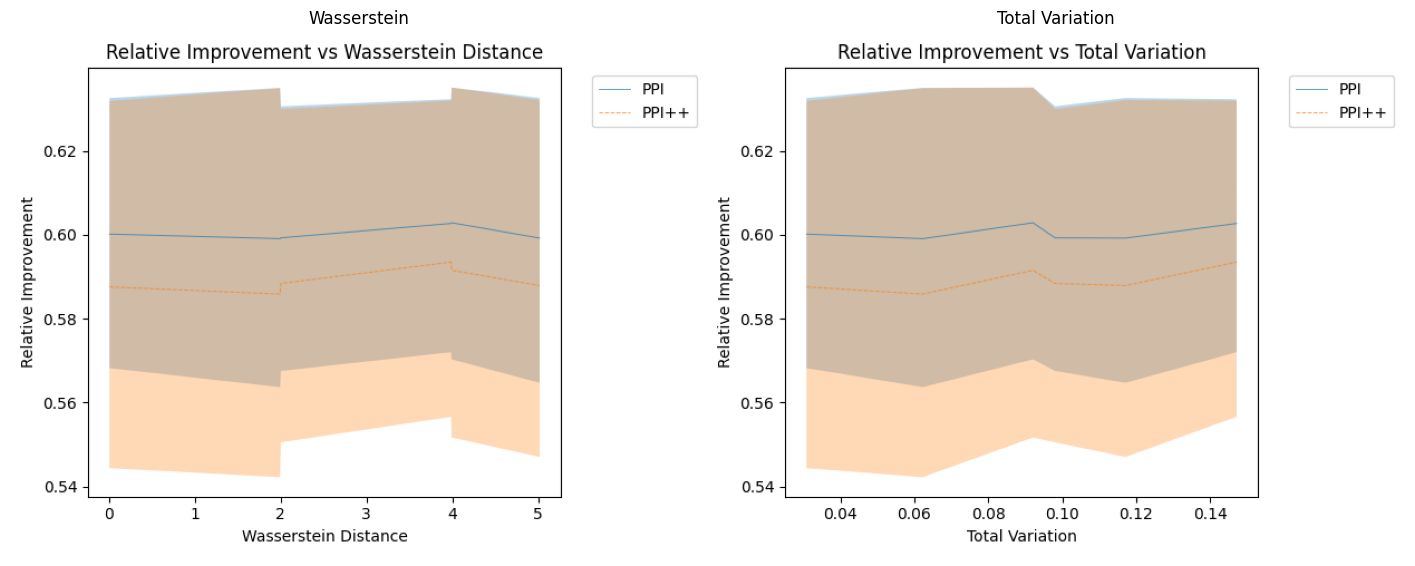

In [16]:
# Display the widths plots

folder = "1kt_nc_lin_reg_2024-08-17-15-41-04"

# Set the variable to the path of the PNG file
wass_ri = f'../experiments/Experiment_2_new/{folder}/plots/relative_improvement_wass.png'
tv_ri = f'../experiments/Experiment_2_new/{folder}/plots/relative_improvement_tv.png'

# Display the PNG file
img_wass_ri = plt.imread(wass_ri)
img_tv_ri = plt.imread(tv_ri)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_wass_ri)
ax[0].axis('off')
ax[0].set_title('Wasserstein')
ax[1].imshow(img_tv_ri)
ax[1].axis('off')
ax[1].set_title('Total Variation')


# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


As expected, the relative improvement is constant, the only reason widths change at all is dependent on the variance of the distribution. For the sake of completion, let's take a look at the relative improvement with respect to Wasserstein Distance/Total Variation Distance from the initial distribution

### Setting 2

#### Non-linear data, difficult fit

In this setting, we will reuse the conditional distribution of $Y$ by setting $Y = 3 \sin(X) + \exp(X/6) + \varepsilon$. To illustrate the relationship this time, we will take a look at the conditional distribution of $Y$ for a large range.

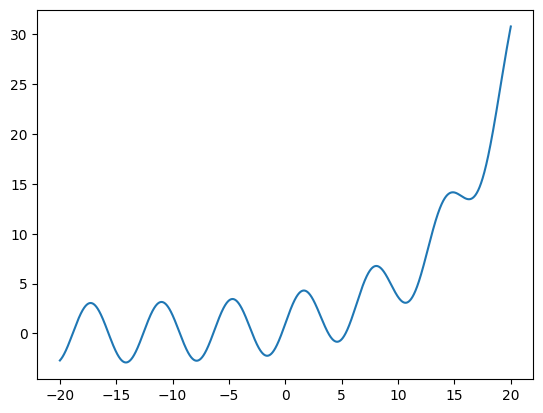

In [17]:
# Perfect distribution plot

x = np.linspace(-20, 20, 10000)
y = 3 * np.sin(x) + np.exp(x/6)

plt.plot(x, y)
plt.show()

In this setting, we will also be taking the $X$ distribution to be variations of the normal distribution. We set the training distribution to be $X \sim N(0, 4)$. We will be varying the distributions of $X$ to be 

- $X_0 \sim N(0, 4)$

- $X_1 \sim N(2, 4)$

- $X_2 \sim N(-2, 4)$

- $X_3 \sim N(4, 4)$

- $X_4 \sim N(-4, 4)$

- $X_5 \sim N(0, 5)$

- $X_6 \sim N(0, 6)$

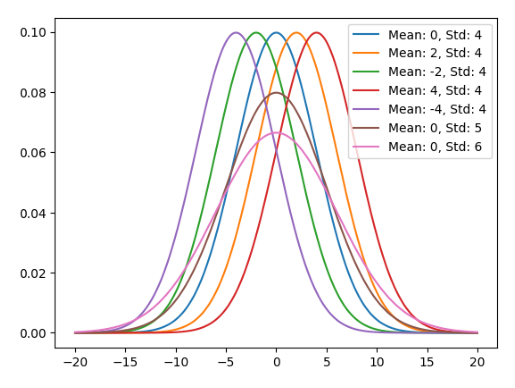

In [18]:
# Display the distribution plots

dist_plot_2 = "../experiments/Experiment_2_new/1kt_nc_nonlin_reg_2024-08-17-15-41-28/plots/distplots.png"

# Display the PNG file

img_dist_plot_2 = plt.imread(dist_plot_2)
plt.imshow(img_dist_plot_2)
plt.axis('off')
plt.show()

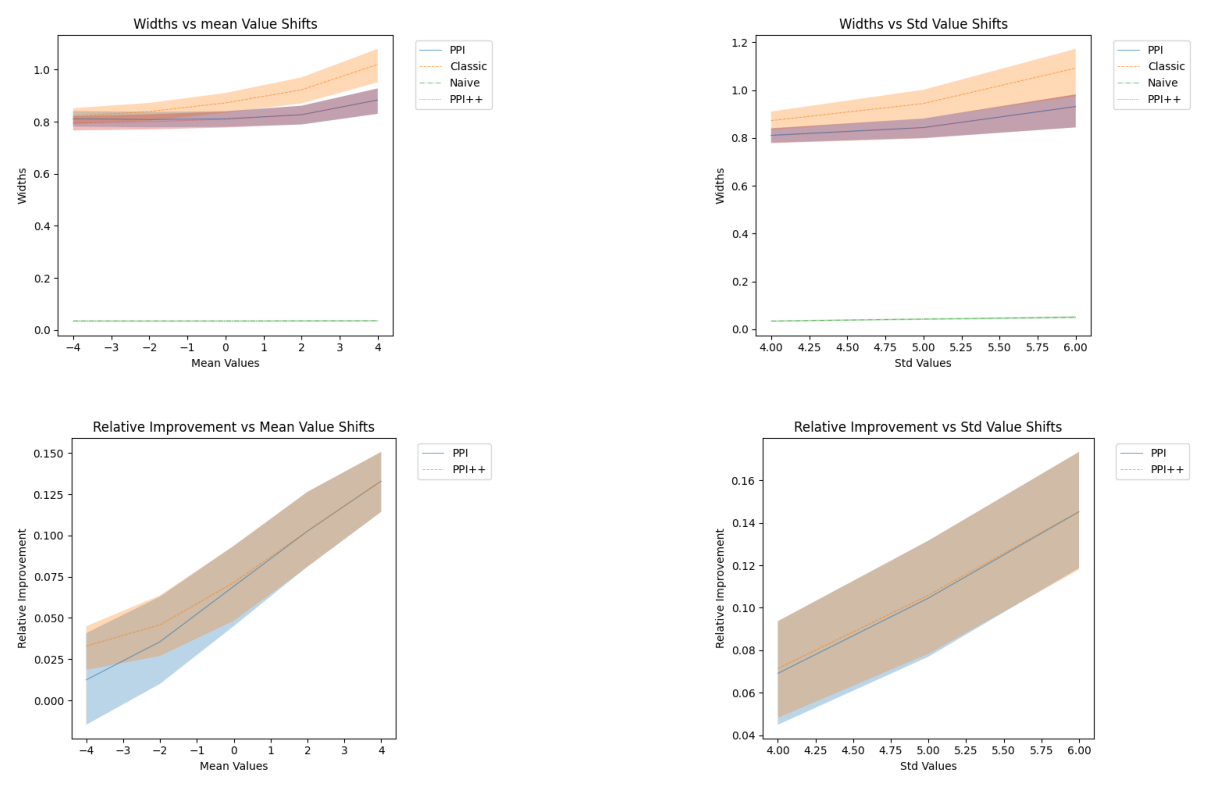

In [19]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
plot_1 = '../experiments/Experiment_2_new/1kt_nc_nonlin_reg_2024-08-17-15-41-28/plots/widths_mean_shifts.png'
plot_2 = '../experiments/Experiment_2_new/1kt_nc_nonlin_reg_2024-08-17-15-41-28/plots/widths_std_shifts.png'
plot_3 = '../experiments/Experiment_2_new/1kt_nc_nonlin_reg_2024-08-17-15-41-28/plots/relative_mean_shifts.png'
plot_4 = '../experiments/Experiment_2_new/1kt_nc_nonlin_reg_2024-08-17-15-41-28/plots/relative_std_shifts.png'

# Display the PNG file
img_plot_1 = plt.imread(plot_1)
img_plot_2 = plt.imread(plot_2)
img_plot_3 = plt.imread(plot_3)
img_plot_4 = plt.imread(plot_4)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_plot_1)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_plot_2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img_plot_3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_plot_4)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


fit bad, bad results, worse rsults as mean travels mostly because of the way regression performs worse as we move more away from the fitted distribution.

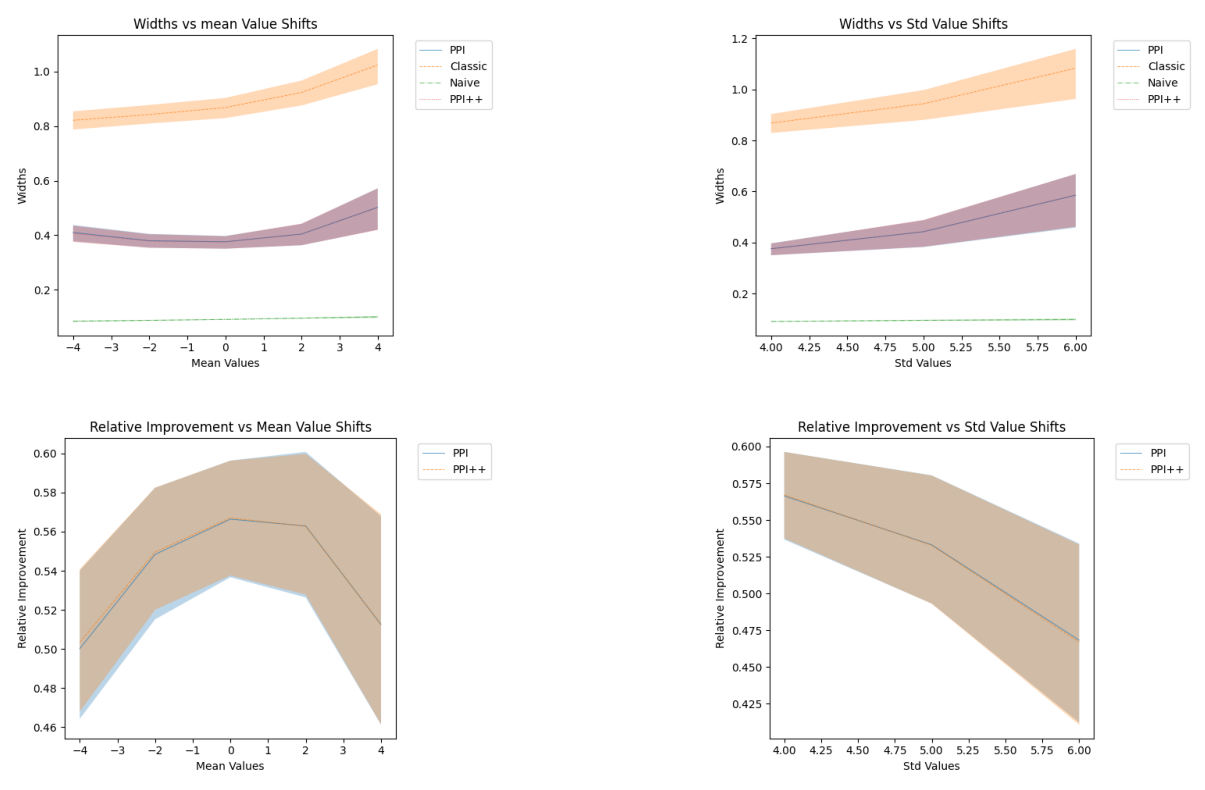

In [20]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
plot_1 = '../experiments/Experiment_2_new/1kt_nc_nonlin_xgb_2024-08-17-15-41-55/plots/widths_mean_shifts.png'
plot_2 = '../experiments/Experiment_2_new/1kt_nc_nonlin_xgb_2024-08-17-15-41-55/plots/widths_std_shifts.png'
plot_3 = '../experiments/Experiment_2_new/1kt_nc_nonlin_xgb_2024-08-17-15-41-55/plots/relative_mean_shifts.png'
plot_4 = '../experiments/Experiment_2_new/1kt_nc_nonlin_xgb_2024-08-17-15-41-55/plots/relative_std_shifts.png'

# Display the PNG file
img_plot_1 = plt.imread(plot_1)
img_plot_2 = plt.imread(plot_2)
img_plot_3 = plt.imread(plot_3)
img_plot_4 = plt.imread(plot_4)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_plot_1)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_plot_2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img_plot_3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_plot_4)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


There is small amounts of performance degredation as we move away from the training distribution, but overall, performance is good.

Let's increase the training size to 50000.

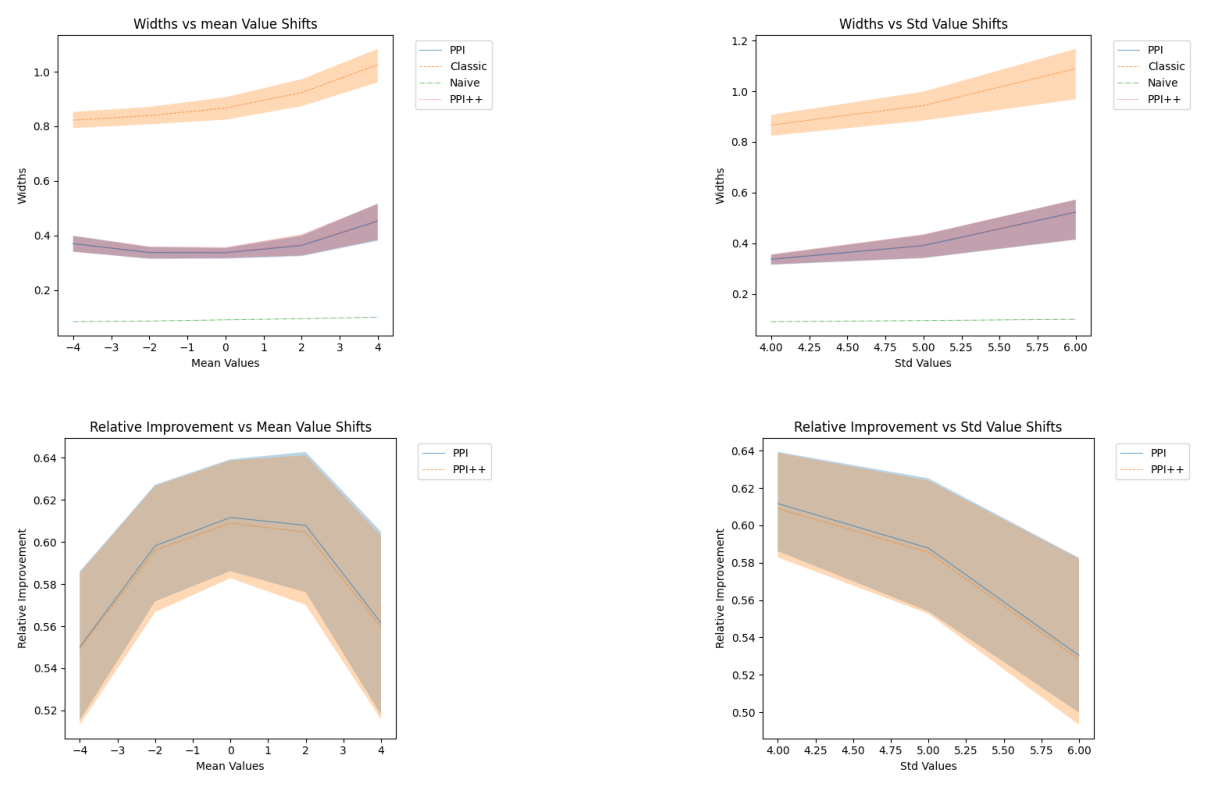

In [21]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
plot_1 = '../experiments/Experiment_2_new/50kt_c_nonlin_xgb_2024-08-17-03-58-43/plots/widths_mean_shifts.png'
plot_2 = '../experiments/Experiment_2_new/50kt_c_nonlin_xgb_2024-08-17-03-58-43/plots/widths_std_shifts.png'
plot_3 = '../experiments/Experiment_2_new/50kt_c_nonlin_xgb_2024-08-17-03-58-43/plots/relative_mean_shifts.png'
plot_4 = '../experiments/Experiment_2_new/50kt_c_nonlin_xgb_2024-08-17-03-58-43/plots/relative_std_shifts.png'

# Display the PNG file
img_plot_1 = plt.imread(plot_1)
img_plot_2 = plt.imread(plot_2)
img_plot_3 = plt.imread(plot_3)
img_plot_4 = plt.imread(plot_4)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_plot_1)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_plot_2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img_plot_3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_plot_4)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


### Experiment 2 Summary

Here are the key insights gained from experiment 2:

- If the training distribution has a large amount of overlap with the labelled and unlabelled distribution, performance is more or less constant
- In a more complex setting, when there are ocassional out of training distribution points, performance starts degrading a little bit
- With more training data, performance improves, as it tends to see more out of distribuiton points
- Clipping when removing unlabelled data points, doesn't have much effect

## Experiment 3

In this experiment, we will redo much of the previous experiment, except this time, the distributions will be much further away so that the model does not know exactly how to predict out of distribution stuff.

The distributions look like the following, we will repeat the non-linear setting

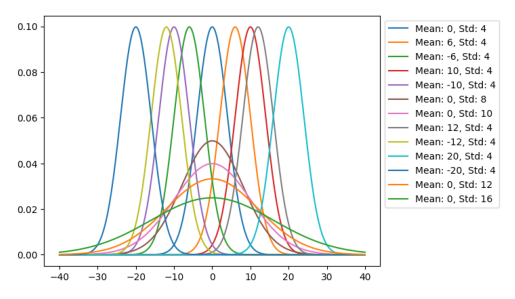

In [22]:
# Display the distribution plots

dist_plot_2 = "../experiments/Experiment_3/exp_3_distplots.png"

# Display the PNG file

img_dist_plot_2 = plt.imread(dist_plot_2)
plt.imshow(img_dist_plot_2)
plt.axis('off')
plt.show()

As an "easy" scenario, suppose that the model fits good on our training distribution, with $N = 10000$, and $n = 128$.

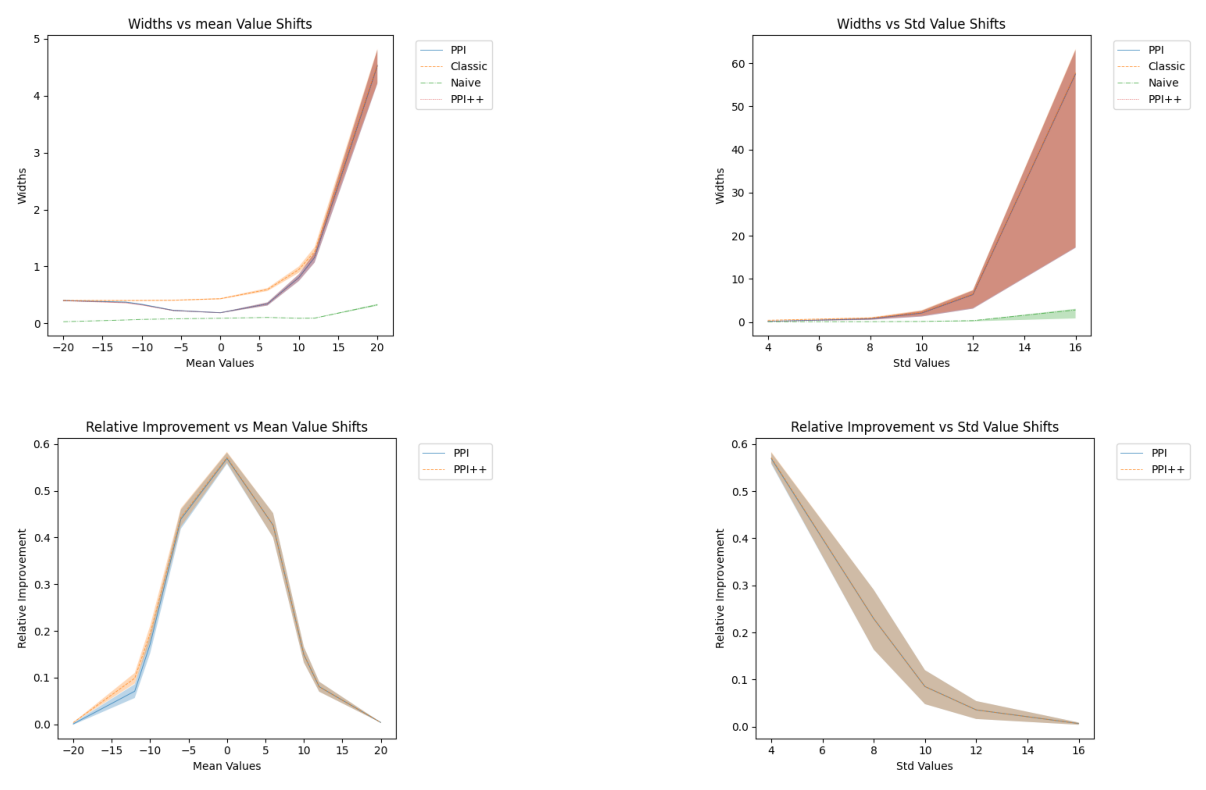

In [47]:
# Display the wdiths vs rho plot

folder = "50kt_nonlin_xgb_2024-08-21-00-56-37"

# Set the variable to the path of the PNG file
plot_1 = f'../experiments/Experiment_3/{folder}/plots/widths_mean_shifts.png'
plot_2 = f'../experiments/Experiment_3/{folder}/plots/widths_std_shifts.png'
plot_3 = f'../experiments/Experiment_3/{folder}/plots/relative_mean_shifts.png'
plot_4 = f'../experiments/Experiment_3/{folder}/plots/relative_std_shifts.png'

# Display the PNG file
img_plot_1 = plt.imread(plot_1)
img_plot_2 = plt.imread(plot_2)
img_plot_3 = plt.imread(plot_3)
img_plot_4 = plt.imread(plot_4)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_plot_1)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_plot_2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img_plot_3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_plot_4)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


Now suppose further that $N = n = 512$, in this case we see the following:

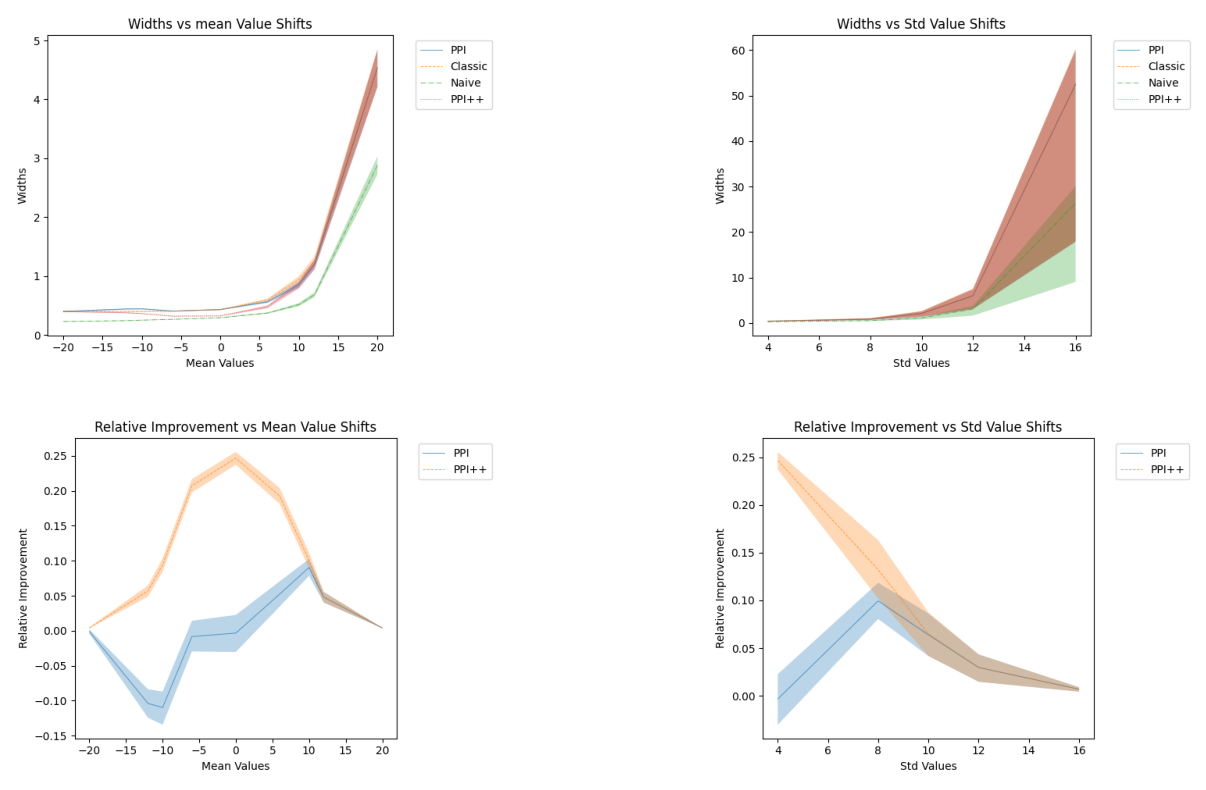

In [24]:
# Display the wdiths vs rho plot

# Set the variable to the path of the PNG file
plot_1 = '../experiments/Experiment_3/50kt_nonlin_xgb_bad_ratio_2024-08-20-04-01-21/plots/widths_mean_shifts.png'
plot_2 = '../experiments/Experiment_3/50kt_nonlin_xgb_bad_ratio_2024-08-20-04-01-21/plots/widths_std_shifts.png'
plot_3 = '../experiments/Experiment_3/50kt_nonlin_xgb_bad_ratio_2024-08-20-04-01-21/plots/relative_mean_shifts.png'
plot_4 = '../experiments/Experiment_3/50kt_nonlin_xgb_bad_ratio_2024-08-20-04-01-21/plots/relative_std_shifts.png'

# Display the PNG file
img_plot_1 = plt.imread(plot_1)
img_plot_2 = plt.imread(plot_2)
img_plot_3 = plt.imread(plot_3)
img_plot_4 = plt.imread(plot_4)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(img_plot_1)
ax[0, 0].axis('off')
ax[0, 1].imshow(img_plot_2)
ax[0, 1].axis('off')
ax[1, 0].imshow(img_plot_3)
ax[1, 0].axis('off')
ax[1, 1].imshow(img_plot_4)
ax[1, 1].axis('off')

# remove the whitespace between the plots
plt.subplots_adjust(wspace=0, hspace=0.1)

# Enlarge the plot
fig.set_size_inches(18, 10)
plt.show()


We can see that performance degrades even further.

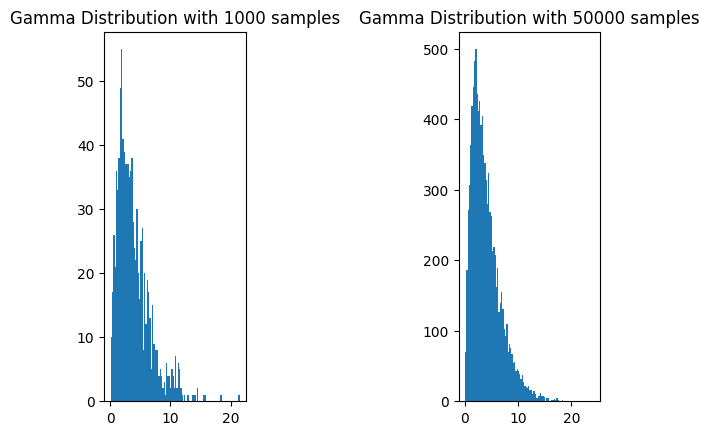

21.482219021075007
24.221929813015095


In [44]:
# Visualize two gamma distribution samples, one with 1000 samples and the other with 50000 samples

gamma_sample_1 = np.random.gamma(2, 2, 1000)
gamma_sample_2 = np.random.gamma(2, 2, 10000)

fig, ax = plt.subplots(1, 2)
ax[0].hist(gamma_sample_1, bins=100)
ax[0].set_title("Gamma Distribution with 1000 samples")
ax[1].hist(gamma_sample_2, bins=100)
ax[1].set_title("Gamma Distribution with 50000 samples")
# put space between the plots

plt.subplots_adjust(wspace=1.5)

plt.show()

# print the max value of the two samples
print(max(gamma_sample_1))
print(max(gamma_sample_2))
